<a href="https://colab.research.google.com/github/REICHIYAN/REI/blob/master/AlgoTrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install git+https://github.com/pydata/pandas-datareader.git

In [0]:
from pandas_datareader import data

start_date = '2010-01-01'
end_date = '2018-01-01'

goog_data = data.DataReader('GOOG', 'yahoo', start_date, )

In [162]:
print(goog_data)

                   High          Low  ...      Volume    Adj Close
Date                                  ...                         
2010-01-04   313.579620   310.954468  ...   3927000.0   312.204773
2010-01-05   312.747742   309.609497  ...   6031900.0   310.829926
2010-01-06   311.761444   302.047852  ...   7987100.0   302.994293
2010-01-07   303.861053   295.218445  ...  12876600.0   295.940735
2010-01-08   300.498657   293.455048  ...   9483900.0   299.885956
...                 ...          ...  ...         ...          ...
2020-05-15  1374.479980  1339.000000  ...   1707700.0  1373.189941
2020-05-18  1392.324951  1354.250000  ...   1824000.0  1383.939941
2020-05-19  1392.000000  1373.484985  ...   1280600.0  1373.484985
2020-05-20  1410.420044  1387.250000  ...   1654200.0  1406.719971
2020-05-21  1415.489990  1393.449951  ...    637866.0  1409.420044

[2614 rows x 6 columns]


In [163]:
signal = pd.DataFrame(index=goog_data.index)
signal['price'] = goog_data['Adj Close']
signal['daily_diferrence'] = signal['price'].diff()

print(signal.head())

                 price  daily_diferrence
Date                                    
2010-01-04  312.204773               NaN
2010-01-05  310.829926         -1.374847
2010-01-06  302.994293         -7.835632
2010-01-07  295.940735         -7.053558
2010-01-08  299.885956          3.945221


In [164]:
import numpy as np

signal['signal'] = 0.0
signal['signal'] = np.where(signal['daily_diferrence'] > 0, 1.0, 0.0)

print(signal.head())

                 price  daily_diferrence  signal
Date                                            
2010-01-04  312.204773               NaN     0.0
2010-01-05  310.829926         -1.374847     0.0
2010-01-06  302.994293         -7.835632     0.0
2010-01-07  295.940735         -7.053558     0.0
2010-01-08  299.885956          3.945221     1.0


In [165]:
signal['positions'] = signal['signal'].diff()
print(signal.head())

                 price  daily_diferrence  signal  positions
Date                                                       
2010-01-04  312.204773               NaN     0.0        NaN
2010-01-05  310.829926         -1.374847     0.0        0.0
2010-01-06  302.994293         -7.835632     0.0        0.0
2010-01-07  295.940735         -7.053558     0.0        0.0
2010-01-08  299.885956          3.945221     1.0        1.0


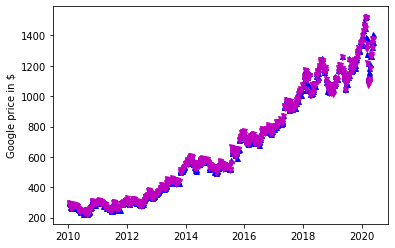

In [166]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
#signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(signal.loc[signal.positions==1.0].index, 
         signal.price[signal.positions==1.0],'^', markersize=5, color='b')

ax1.plot(signal.loc[signal.positions==-1.0].index, 
         signal.price[signal.positions==-1.0],'v', markersize=5, color='m')